# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Problem Statement-1 Clustering

<font color=darkblue>A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.</font> 

### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Data Dictionary for Market Segmentation:

<font color=darkblue> 
* spending: Amount spent by the customer per month (in 1000s)
* advance_payments: Amount paid by the customer in advance by cash (in 100s)
* probability_of_full_payment: Probability of payment done in full by the customer to the bank
* current_balance: Balance amount left in the account to make purchases (in 1000s)
* credit_limit: Limit of the amount in credit card (10000s)
* min_payment_amt: minimum paid by the customer while making payments for purchases made monthly (in 100s)
* max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)
</font> 

### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.1	Read the data and do exploratory data analysis. Describe the data briefly.

In [1]:
# Import Neccessary packages
import os

# supress warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Libraries
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(context='notebook',palette='Spectral',style='darkgrid',font_scale=1.5,color_codes=True)

# To Scale our data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster,cut_tree
from sklearn.cluster import AgglomerativeClustering

# To perform KMeans clustering 
from sklearn.cluster import KMeans

#Model Validation:
from sklearn.metrics import silhouette_score

In [2]:
# Read Data
bank_df = pd.read_csv('bank_marketing_part1_Data.csv')

In [3]:
# Check head of the data
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
# Dataset is available in different units,lets make it in a single unit

bank_df['spending'] = bank_df.spending * 1000
bank_df['advance_payments'] = bank_df.advance_payments * 100
bank_df['credit_limit'] = bank_df.credit_limit * 10000
bank_df['current_balance'] = bank_df.current_balance * 1000
bank_df['min_payment_amt'] = bank_df.min_payment_amt * 100
bank_df['max_spent_in_single_shopping'] = bank_df.max_spent_in_single_shopping * 1000

In [5]:
# Check head of the data
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0


In [6]:
# Data Inspection (Dimension)
row, col = bank_df.shape
print("There are total {}".format(row), "Observations and {}".format(col), "variables in the dataset")

There are total 210 Observations and 7 variables in the dataset


In [7]:
# Data Structure
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [8]:
# Number Summary
round(bank_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14847.52,2909.70,10590.00,12270.00,14355.00,17305.00,21180.00
advance_payments,210.0,1455.93,130.60,1241.00,1345.00,1432.00,1571.50,1725.00
probability_of_full_payment,210.0,0.87,0.02,0.81,0.86,0.87,0.89,0.92
current_balance,210.0,5628.53,443.06,4899.00,5262.25,5523.50,5979.75,6675.00
credit_limit,210.0,32586.05,3777.14,26300.00,29440.00,32370.00,35617.50,40330.00
min_payment_amt,210.0,370.02,150.36,76.51,256.15,359.90,476.88,845.60
max_spent_in_single_shopping,210.0,5408.07,491.48,4519.00,5045.00,5223.00,5877.00,6550.00


In [9]:
# Check for Missing Values
bank_df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

* **There are no missing values found for a given banking customer dataset.** 

In [10]:
# Check for duplicate records
dup = bank_df.duplicated()
print(dup.sum())
bank_df[dup]

0


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


* **There are no duplicate records found for a given dataset.**

## Univariate Analysis

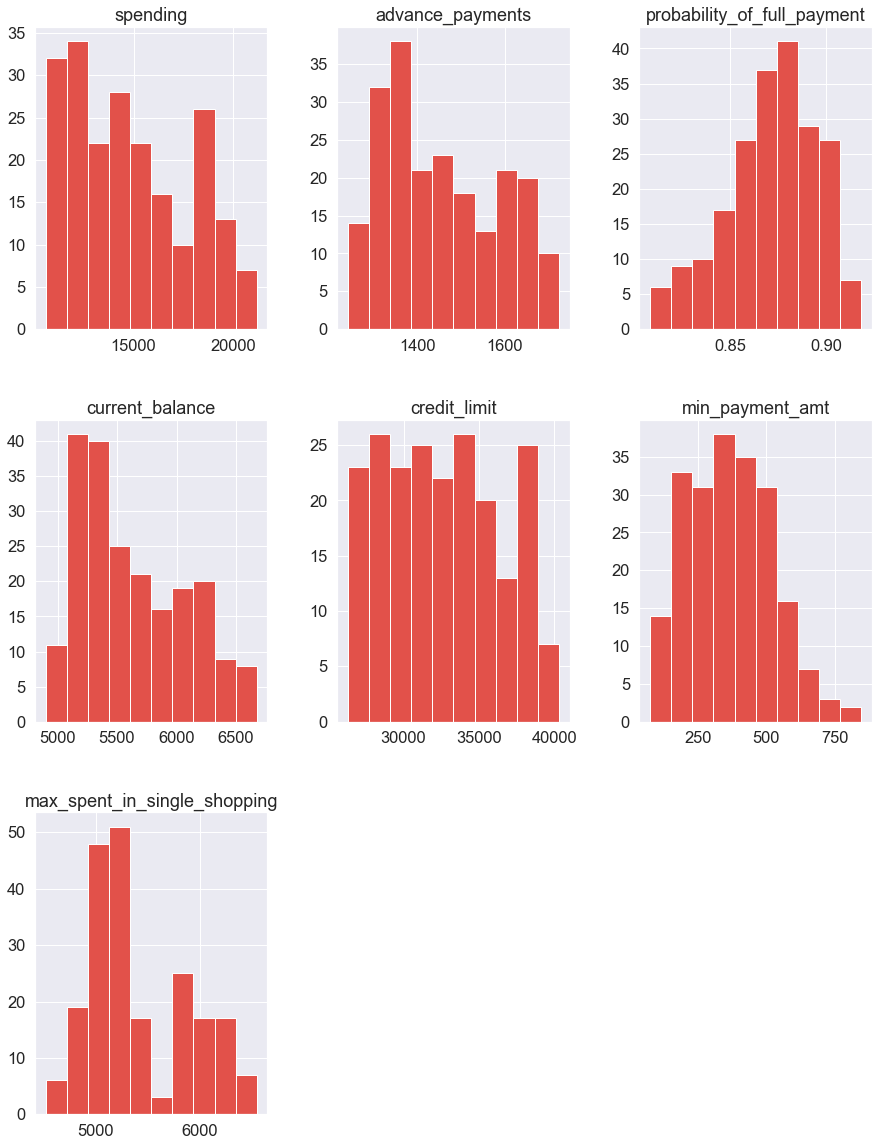

In [11]:
# Checking distributions using histograms:
fig = plt.figure(figsize=(15,20))
ax=fig.gca()
bank_df.hist(ax=ax)
plt.show()

In [12]:
#Skewness
bank_df.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

## Multi-variate Analysis

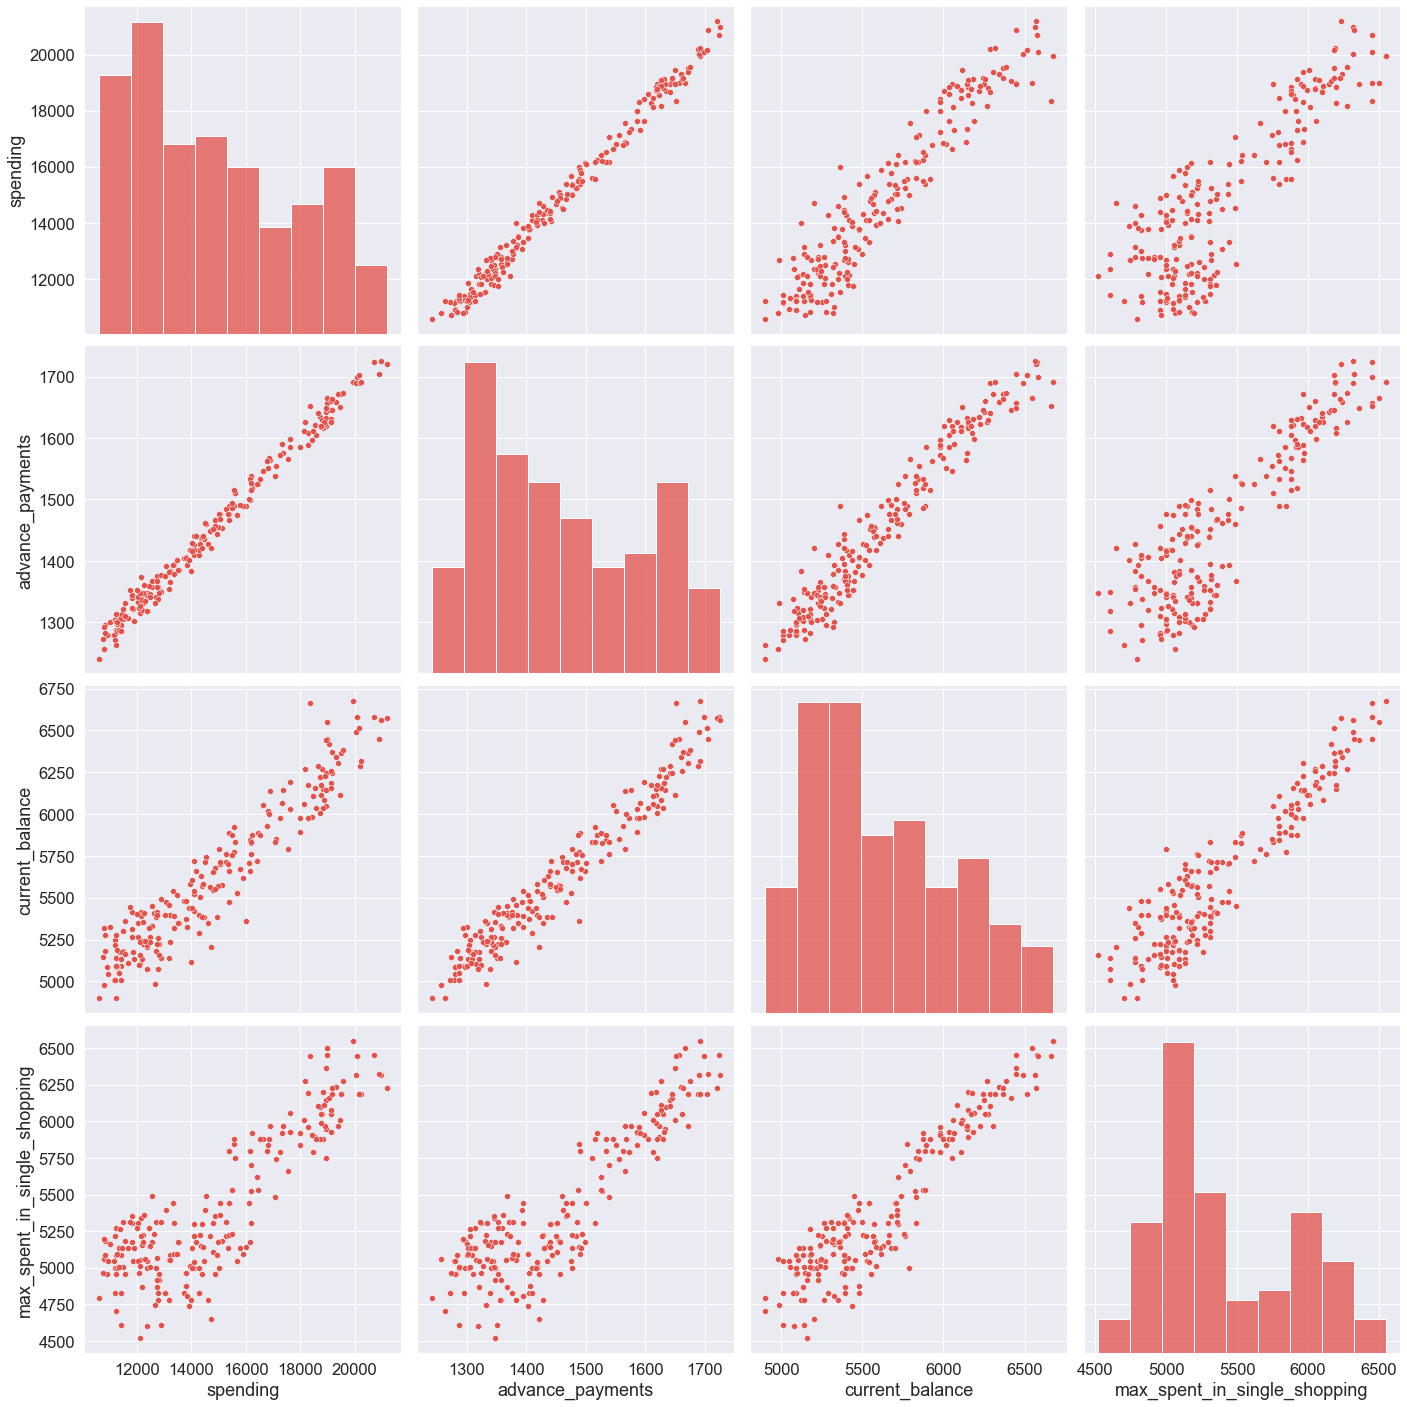

In [13]:
# Multivariate Analysis using Scatterplot:
sns.pairplot(data=bank_df[['spending','advance_payments','current_balance','max_spent_in_single_shopping']],height=5);

In [14]:
#Checking which features are correlated with each other and are correlated with the outcome variable
df_corr = bank_df.corr()
df_corr

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


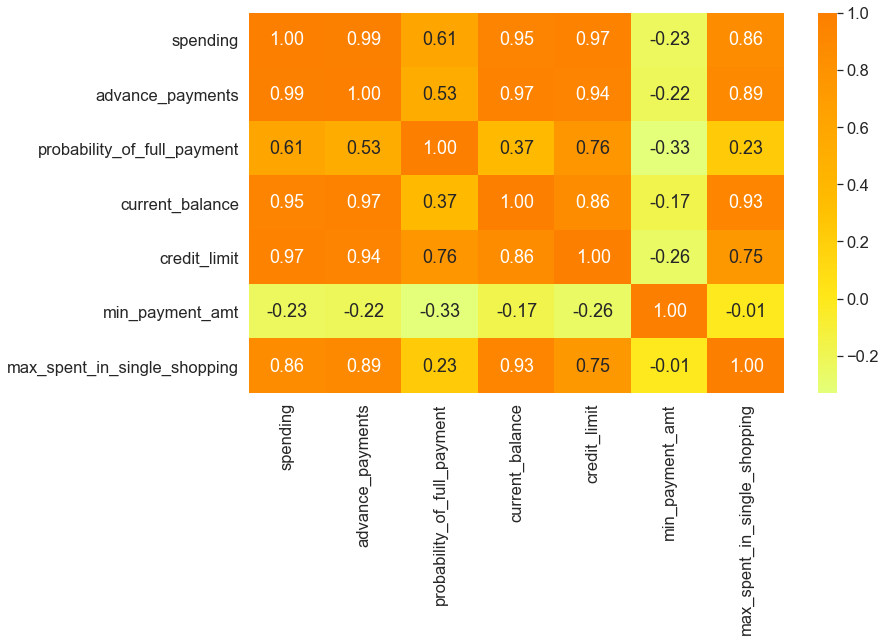

In [15]:
# Plot heatmap to visualize correlation between variables:
plt.figure(figsize=(12,7))
sns.heatmap(df_corr, annot=True,fmt='.2f',cmap='Wistia')
plt.show()

### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.2	 Do you think scaling is necessary for clustering in this case? Justify.

### Standardization or Z-transformation¶

* **From the dataset we can see the features are on different scale and are of different magnitudes some are in 100's ; 1000's; 10000's.**
* **Since Clustering technique work based on distance calculations. We need to make sure the data is scaled before we build clsutering model to get more accurate results.**
* **For the given problem statement we perform z-transformation Scaling.**

In [16]:
# Standardise all features
# Create Instance for StandardScaler
X = StandardScaler()
#assign scalar to column
df_scaled = X.fit_transform(bank_df) ## Structure of the ouput is np.array
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['spending','advance_payments','probability_of_full_payment','current_balance','credit_limit','min_payment_amt','max_spent_in_single_shopping']
df_scaled.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,1.340198e-16,7.602384e-16,1.260896e-15,-9.886272e-16,1.799486e-16,8.617445e-17,2.955308e-16
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.3	Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them.

**Hierarchical clustering is applied on the scaled dataset. Clusters are created between the variables ‘spending’ and ‘current balance’ with a consideration that based on the spending and balance available, business can identify the customer profile from segmentation perspective.**

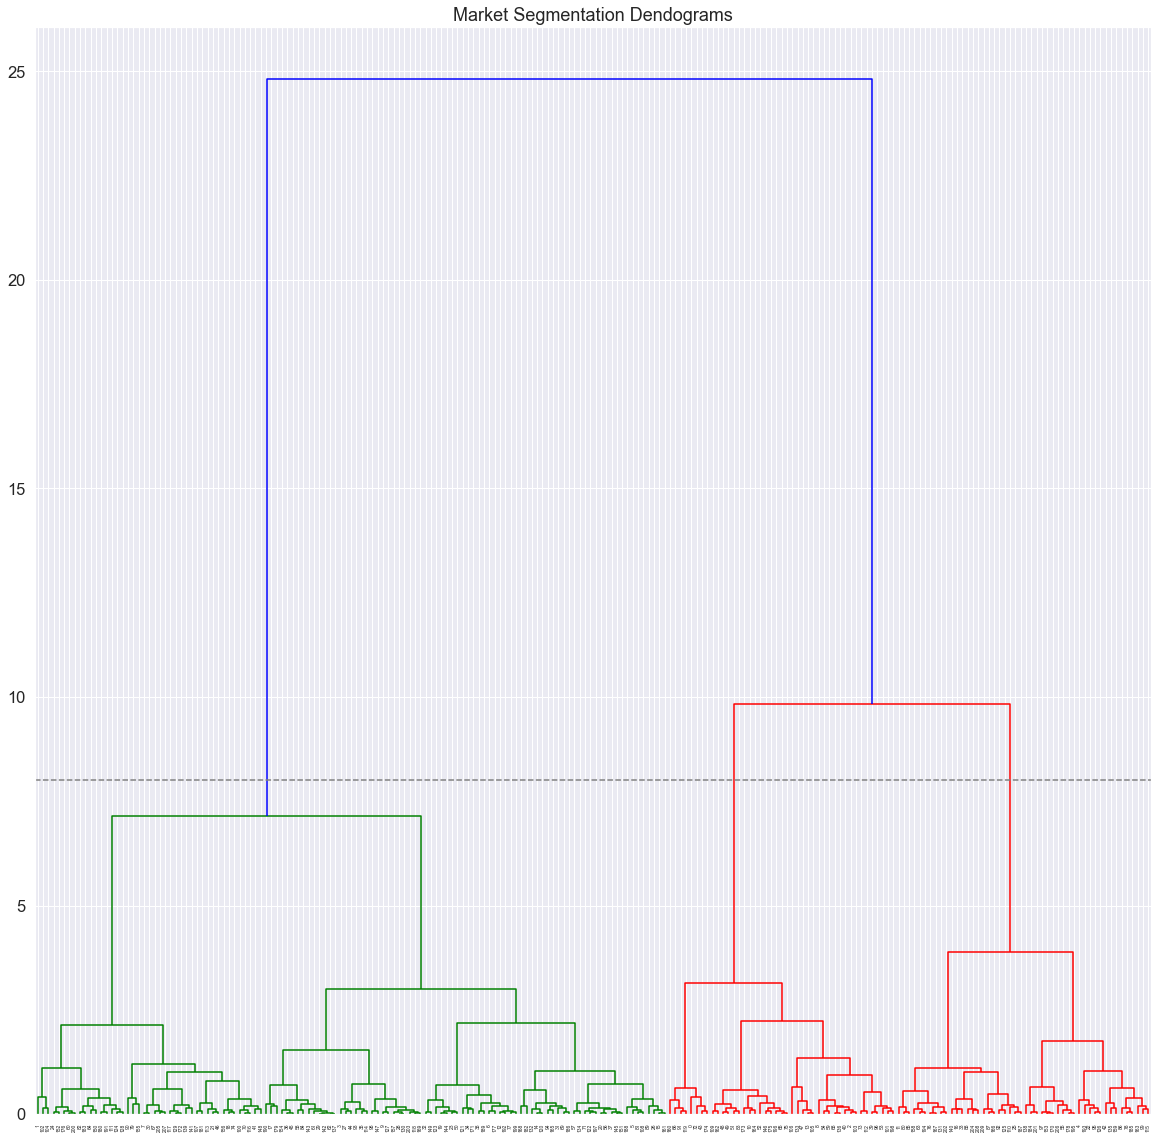

In [17]:
Z=df_scaled.iloc[:,[0,3]].values
plt.figure(figsize=(20, 20))
plt.title("Market Segmentation Dendograms")
dend = dendrogram(linkage(Z,method='ward',metric='euclidean'))
plt.axhline(8,color='gray',linestyle='--')
plt.show()

### Truncated dendrogram shows that best segmentation can be derived from 2 clusters.

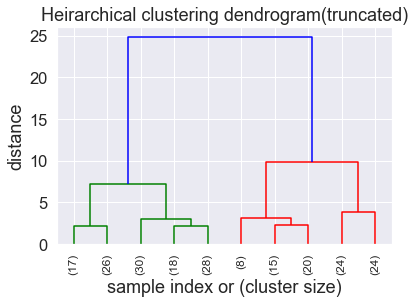

In [18]:
z = linkage(Z,method="ward",metric='euclidean')
plt.title('Heirarchical clustering dendrogram(truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(z,
           truncate_mode='lastp', # show only the last p merged clusters
           p = 10, # show only the last p merged clusters
           leaf_rotation =90.,
           leaf_font_size =12.,
          )
plt.show()

* **However as normally to understand the dataset, normally 2 clusters are not preferred because in most of the cases, business is already aware about the 2 classes in the dataset and hence to generate some more insights, segmentation with more than 2 clusters is preferred.**

* **As an example, for a bank dataset, bank would like to know more than ‘good’ and ‘not so good’ customers and hence more insight we are able to generate with more than 2 clusters, better it is for business.**

* **Hence let’s consider 3 clusters and plot the clusters to confirm if the desired clusters are providing the required segmentation details.**

# Using Scipy's Fcluster

[2 1 2 1 3 1 1 1 2 1 2 3 1 2 1 1 3 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 1 3 1 1 1
 1 1 2 2 1 3 2 1 1 1 2 2 2 1 2 2 2 2 3 1 1 1 2 1 1 1 3 1 2 2 1 2 1 1 1 2 2
 1 2 3 1 3 1 3 1 1 2 1 3 3 3 3 1 1 2 3 1 1 3 2 3 1 3 1 2 1 2 1 2 2 1 1 2 3
 1 2 1 1 3 1 1 1 2 1 1 1 1 1 3 3 1 1 1 1 3 1 2 1 3 2 1 3 1 3 1 1 1 1 1 2 1
 1 1 1 1 1 3 1 1 1 1 3 3 2 1 2 3 2 1 3 3 1 1 3 1 1 2 2 2 1 1 3 1 1 1 1 1 3
 3 1 3 1 1 1 1 1 3 3 3 2 1 2 1 1 3 3 1 3 1 3 1 3 3]


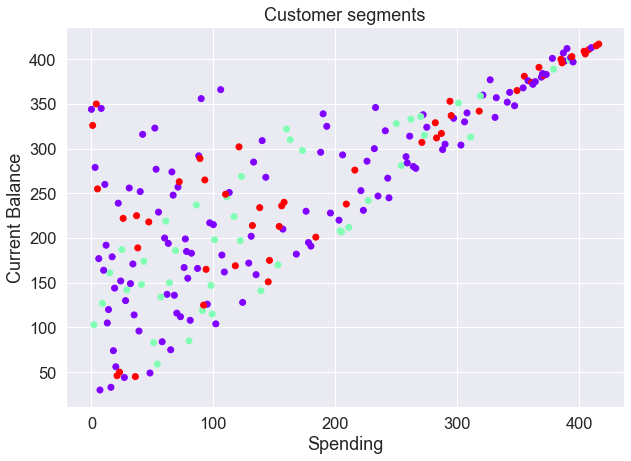

In [19]:
cluster_fclust= fcluster(z, 3, criterion='maxclust')
print(cluster_fclust)
plt.figure(figsize=(10,7))
plt.scatter(z[:,0],z[:,1],c=cluster_fclust[1:],cmap='rainbow')
plt.title('Customer segments')
plt.xlabel('Spending')
plt.ylabel('Current Balance')
plt.show()

**First “f-cluster” technique was used to create the clusters. However, as we can see from the given below plot, segmentation was not very clear.**

**Hence Agglomerative technique was used for the given dataset. Following is a plot with a clear segmentation of the dataset for the selected features.**

# Using Sk-Learn's Agglomerative Clustering Class to get better segments

In [20]:
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')
Cluster_agglo =cluster.fit_predict(z)
print(Cluster_agglo)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 2 1 2 2 0 0 0 2 2 1 1 2 2 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


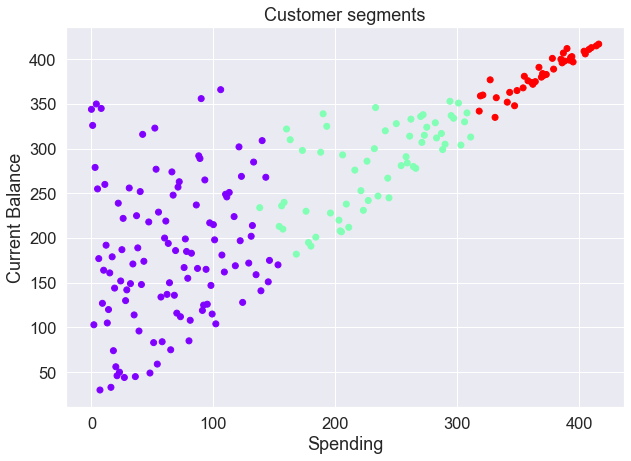

In [21]:
plt.figure(figsize=(10,7))
plt.scatter(z[:,0],z[:,1],c=cluster.labels_,cmap='rainbow')
plt.title('Customer segments')
plt.xlabel('Spending')
plt.ylabel('Current Balance')
plt.show()

**Clusters were tried with all the features, however spending and customer balance is giving the good customer segmentation which is usefull to gather business insights.**

# Additional set of commands to check the cluster with all variables

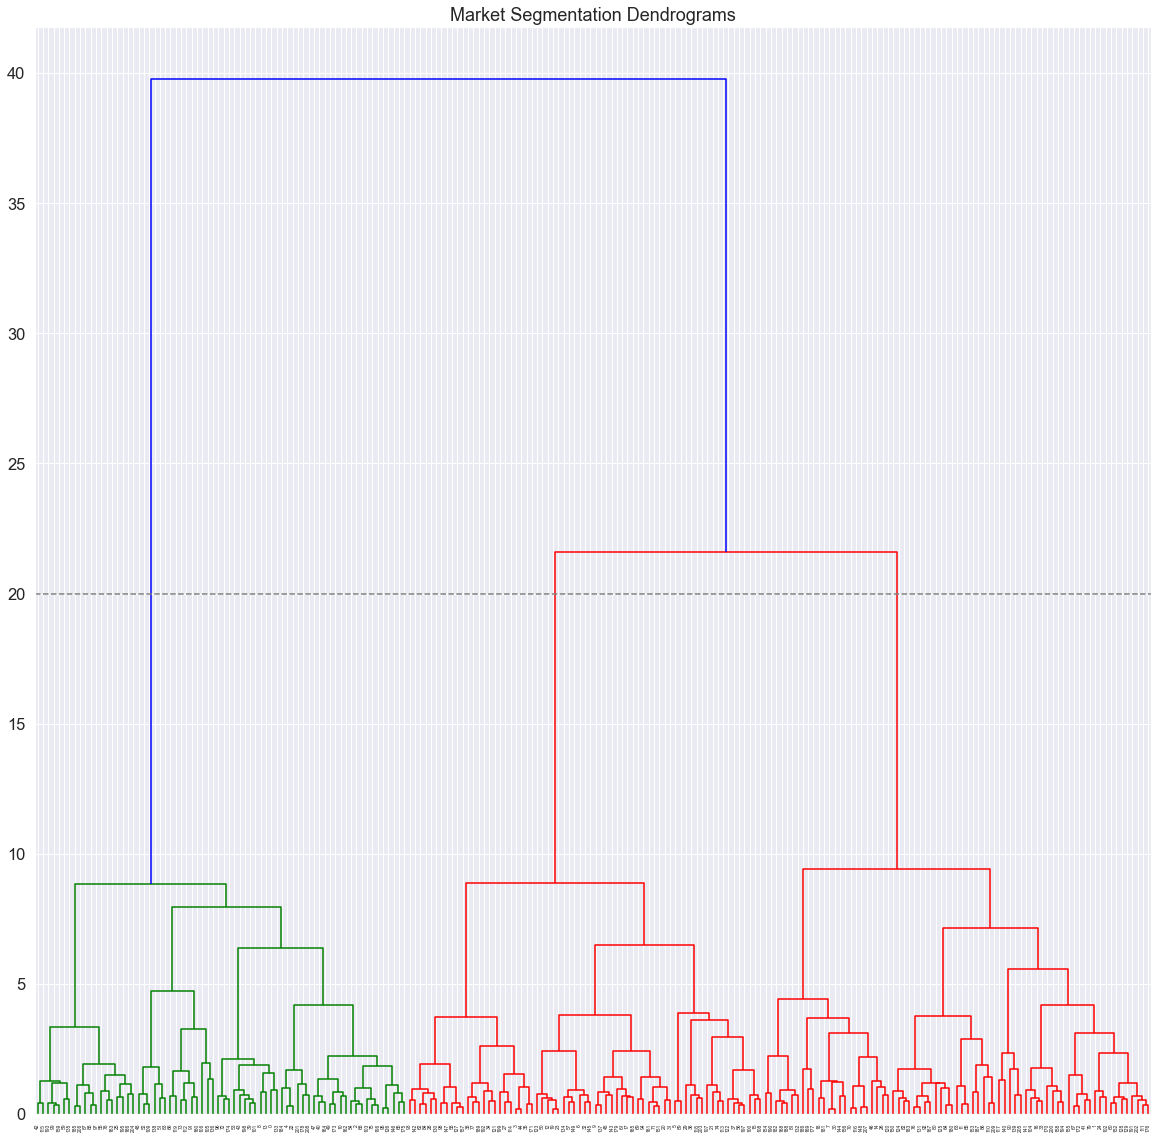

In [22]:
import scipy.cluster.hierarchy as shc
Z1 = df_scaled.iloc[:,[0,1,2,3,4,5,6]].values
plt.figure(figsize=(20,20))
plt.title('Market Segmentation Dendrograms')
dend = shc.dendrogram(shc.linkage(Z1,method='ward'))
plt.axhline(20,color='gray',linestyle='--')
plt.show()

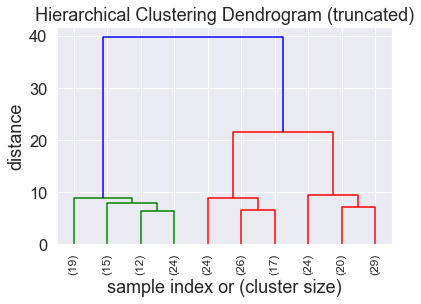

In [23]:
Z2 = linkage(Z1,'ward',metric='euclidean')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(Z2,
          truncate_mode='lastp', # show only the last p merged clusters
          p=10, #show only the last p merged clusters
          leaf_rotation=90.,
          leaf_font_size=12.,)
plt.show()

## Using Scipy's fcluster

In [24]:
cluster_fclust = fcluster(linkage(Z1,method='ward'),3,criterion='maxclust')
print(cluster_fclust)

[1 3 1 2 1 2 2 3 1 2 1 3 2 1 3 2 3 2 3 2 2 2 1 2 3 1 3 2 2 2 3 2 2 3 2 2 2
 2 2 1 1 3 1 1 2 2 3 1 1 1 2 1 1 1 1 1 2 2 2 1 3 2 2 3 3 1 1 3 1 2 3 2 1 1
 2 1 3 2 1 3 3 3 3 1 2 3 3 1 1 2 3 1 3 2 2 1 1 1 2 1 2 1 3 1 3 1 1 2 2 1 3
 3 1 2 2 1 3 3 2 1 3 2 2 2 3 3 1 2 3 3 2 3 3 1 2 1 1 2 1 3 3 3 2 2 3 2 1 2
 3 2 3 2 3 3 3 3 3 2 3 1 1 2 1 1 1 2 1 3 3 3 3 2 3 1 1 1 3 3 1 2 3 3 3 3 1
 1 3 3 3 2 3 3 2 1 3 1 1 2 1 2 3 1 3 2 1 3 1 3 1 3]


## Using SK-Learn's Agglomerative Clustering Class to get better segments

In [25]:
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cluster=cluster.fit_predict(Z1)
print(cluster)

[1 0 1 2 1 2 2 0 1 2 1 0 2 1 0 2 0 2 0 2 2 2 1 2 0 1 0 2 2 2 0 2 2 0 2 2 2
 2 2 1 1 0 1 1 2 2 0 1 1 1 2 1 1 1 1 1 2 2 2 1 0 2 2 0 0 1 1 0 1 2 0 2 1 1
 2 1 0 2 1 0 0 0 0 1 2 0 0 1 1 2 0 1 0 2 2 1 1 1 2 1 2 1 0 1 0 1 1 2 2 1 0
 0 1 2 2 1 0 0 2 1 0 2 2 2 0 0 1 2 0 0 2 0 0 1 2 1 1 2 1 0 0 0 2 2 0 2 1 2
 0 2 0 2 0 0 0 0 0 2 0 1 1 2 1 1 1 2 1 0 0 0 0 2 0 1 1 1 0 0 1 2 0 0 0 0 1
 1 0 0 0 2 0 0 2 1 0 1 1 2 1 2 0 1 0 2 1 0 1 0 1 0]


### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.4	Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [26]:
X = df_scaled.iloc[:,[0,3]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,init='k-means++',random_state=27)
    kmeans.fit(X)
    #inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

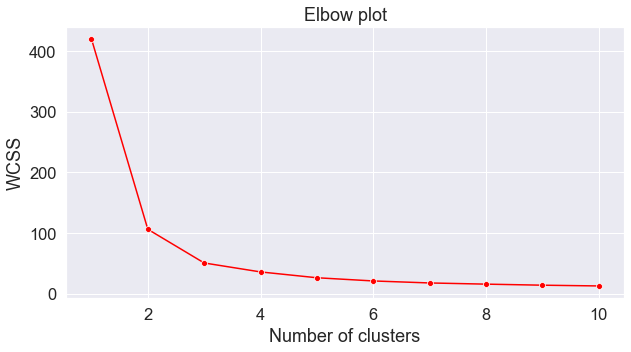

In [27]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1,11),wcss,marker='o',color='red')
plt.title('Elbow plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**K-means clustering technique was used along with elbow curve to define the optimum clusters for this data set. Once again Spending and current Balance features were used to build the cluster. As per the Elbow method, 3 cluster were identified as an optimum number.**

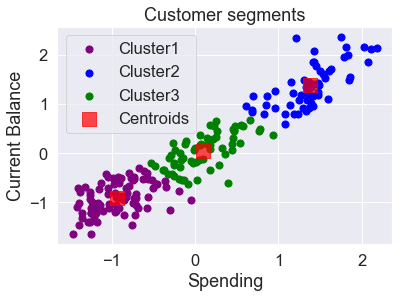

In [28]:
#Visualising the clusters
##Fitting kmeans to the dataset with k=3
km4 = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=27)
y_means =km4.fit_predict(X)
#Visualizing the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50,c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50,c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50,c='green',label='Cluster3')

plt.scatter(km4.cluster_centers_[:,0],km4.cluster_centers_[:,1],s=200,marker='s',c='red',alpha=0.7,label='Centroids')
plt.title('Customer segments')
plt.xlabel('Spending')
plt.ylabel('Current Balance')
plt.legend()
plt.show()

### Silhouette Analysis

In [29]:
# Method-1:
ss = {}

for i in range(2, 11):
    clusterer = KMeans(n_clusters=i, init='k-means++',random_state=27)
    y = clusterer.fit_predict(X)
    #higher upto 1 the better
    s=silhouette_score(X,y)
    ss[i]=round(s,3)
    print('The average silhouette score for {} clusters is {}'.format(i,s))

The average silhouette score for 2 clusters is 0.6242504781982778
The average silhouette score for 3 clusters is 0.5588248642859823
The average silhouette score for 4 clusters is 0.4852954749118399
The average silhouette score for 5 clusters is 0.4656505833367352
The average silhouette score for 6 clusters is 0.41601132152310444
The average silhouette score for 7 clusters is 0.3992376111381464
The average silhouette score for 8 clusters is 0.4055341237368032
The average silhouette score for 9 clusters is 0.39248734994256274
The average silhouette score for 10 clusters is 0.3772622462413429


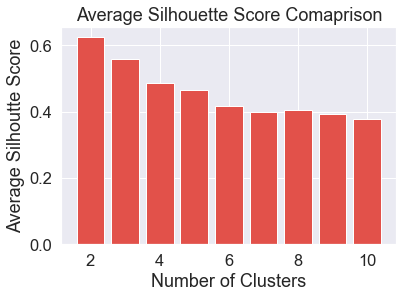

In [30]:
plt.bar(ss.keys(),ss.values())
plt.title('Average Silhouette Score Comaprison')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhoutte Score')
plt.show()

**As per the silhouette score, optimal number of clusters are 2. However as mentioned earlier, 2 is not preferred way of profiling the dataset and hence the ideal number of clusters to be considered is 3. With a silhouette score of 0.5588.**

In [31]:
bank_df['CNo']=cluster
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,CNo
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,1
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,0
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0,1
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0,2
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0,1


In [32]:
group1 =bank_df[bank_df['CNo']==0]
group2 =bank_df[bank_df['CNo']==1]
group3 =bank_df[bank_df['CNo']==2]

In [33]:
group1.mean()

spending                        14199.041096
advance_payments                 1423.356164
probability_of_full_payment         0.879190
current_balance                  5478.232877
credit_limit                    32264.520548
min_payment_amt                   261.218082
max_spent_in_single_shopping     5086.178082
CNo                                 0.000000
dtype: float64

In [34]:
group2.mean()

spending                        18371.428571
advance_payments                 1614.542857
probability_of_full_payment         0.884400
current_balance                  6158.171429
credit_limit                    36846.285714
min_payment_amt                   363.915714
max_spent_in_single_shopping     6017.371429
CNo                                 1.000000
dtype: float64

In [35]:
group3.mean()

spending                        11872.388060
advance_payments                 1325.701493
probability_of_full_payment         0.848072
current_balance                  5238.940299
credit_limit                    28485.373134
min_payment_amt                   494.943284
max_spent_in_single_shopping     5122.208955
CNo                                 2.000000
dtype: float64

### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.5	Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

**As hierarchical clustering has provided a better segmentation, the output obtained from the same would be used to define the customer strategies.**

**In today’s competitive world, it is crucial to understand customer behaviour and categorize customers based on their demography and buying behaviour. This is a critical aspect of customer segmentation that allows marketers to better tailor their marketing efforts to various audience subsets in terms of promotional marketing and product development strategies.**

**Based on the clusters obtained from hierarchical clustering strategy for different segment of customers is as follows:**

* **Type 1 Customers (Represented by purple Dots in the hierarchical cluster plot) Segment wherein spending is not that high, but there are good number of customers with a high current balance. So, for these customers, reasons need to be identified why the available balance is not being utilised. To start with survey could be conducted to understand if suitable offers/options are not available on the ecommerce sites wherein customer does purchase or have they faced any specific challenge while using the card because of which spending on the card are low etc.**

* **Type 2 Customers (Represented by purple Dots in the hierarchical cluster plot wherein spending is high and current balance is low) – Bank can analyse this segment to understand if these customers could be offered a different product and/ or if their existing credit limit could be increased based on their profile details as these customers might spend more if they have sufficient balance.**

* **Type 3 Customers (Represented by Red Dots in the hierarchical cluster plot wherein both spending and current balance are high). This is probably a high value customer and hence special discounted pricing based promotional campaigns for this group to increase their spending and use current balance.**

* **Type 4 Customers (Represented by Green Dots in the hierarchical cluster plot wherein both spending and current balance are moderate). Further analysis could be performed to understand what would make this segment to move into Red area.**